# Seguimiento semana 2
Integrantes:

1.   Yuliana Duarte Quintero
2.   Dilia Maria Luna Melo

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

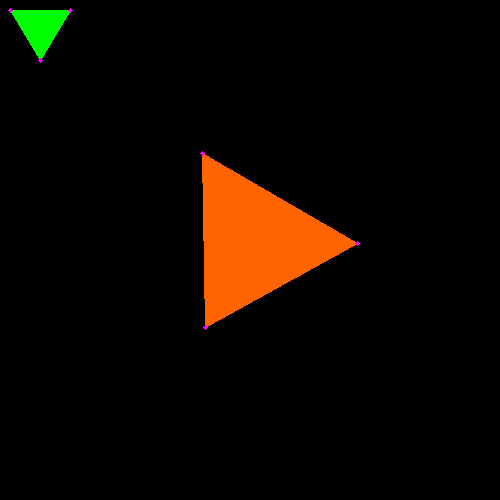

In [ ]:
# Función para dibujar un triángulo en una imagen
def draw_triangle(im, triangle, color=(0,255,0)):
    # Normalizar coordenadas homogéneas dividiendo por el último valor (coordenada z)
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    # Dibujar el triángulo
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    #Dibujar puntos en los vértices del triángulo
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

# Función para aplicar una transformación de escala a un vértice
def scale(vertex, sx, sy):
    scale_matrix = np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1]])
    x=scale_matrix @ vertex.T
    return x.T

# Función para aplicar una transformación de rotación a un vértice
def rotate(vertex, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],[np.sin(rad), np.cos(rad), 0],[0, 0, 1]])
    w =rotation_matrix @ vertex.T
    return w.T

# Función para aplicar una transformación de traslación a un vértice
def translate(vertex, dx, dy):
     # Implementa la función de translación
    translation_matrix = np.array([[1, 0, dx],[0, 1, dy],[0, 0, 1]])
    v = translation_matrix @ vertex.T
    return v.T

# Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

## Parámetros de las transformaciones
angle = 30 # Angulo de rotacion
s = 3 # factor de escala
t = 250 # Traslacion

# Sistema coordenado de imagenes
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])

# Aplicar transformaciones al triángulo original para obtener el segundo triángulo
# 1. Trasladar el triángulo original a la posición deseada (-40,-30)
# 2. Escalar el triángulo trasladado
# 3. Rotar el triángulo escalado
# 4. Trasladar el triángulo rotado a la posición deseada (250,250)
triangle2 = translate(rotate( scale(translate(triangle1, -40,-30),s,s) ,angle), t,t)

# Dibujar los triángulos en la imagen
draw_triangle(im, triangle1)
#draw_triangle(im,translate(triangle1,50,50),color=(255,255,0))
#draw_triangle(im,rotate(triangle1,angle),color=(255,255,0))
draw_triangle(im, triangle2, color= (0,100,255))

# Mostrar la imagen con los triángulos dibujados
cv2_imshow(im)